## Risk_Prediction

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("preprocessed_dengue_data.csv")


In [3]:
df.head()

,Age,Gender,Temperature,Humidity,Rainfall,Platelet_Count,Outcome,Month,Year,Age_group,...,Symptom_fatigue,Symptom_Fever,Symptom_headache,Symptom_joint pain,Symptom_nausea,Symptom_bleeding,Symptom_retro-orbital pain,Symptom_chills,Symptom_rash,Outcome_encoded
0,48,0,25.7,82.8,45.0,110619,Recovered,6,2022,2,...,0,1,0,1,0,0,0,0,0,3
1,19,1,29.8,63.6,0.0,62974,Hospitalized,4,2022,1,...,0,1,0,0,0,0,1,0,0,2
2,33,1,23.8,92.9,10.0,78755,Hospitalized,7,2023,1,...,0,1,0,0,0,0,1,0,0,2
3,49,0,26.0,79.1,1.0,20787,Critical,8,2022,2,...,0,1,0,0,0,1,0,0,0,0
4,44,0,25.0,82.9,60.0,134421,Recovered,7,2024,2,...,0,1,0,0,0,0,0,0,0,3


In [4]:
df['High_Risk'] = df['Outcome'].apply(lambda x: 1 if x in ['Critical', 'Dead'] else 0)


In [5]:
df.head()

,Age,Gender,Temperature,Humidity,Rainfall,Platelet_Count,Outcome,Month,Year,Age_group,...,Symptom_Fever,Symptom_headache,Symptom_joint pain,Symptom_nausea,Symptom_bleeding,Symptom_retro-orbital pain,Symptom_chills,Symptom_rash,Outcome_encoded,High_Risk
0,48,0,25.7,82.8,45.0,110619,Recovered,6,2022,2,...,1,0,1,0,0,0,0,0,3,0
1,19,1,29.8,63.6,0.0,62974,Hospitalized,4,2022,1,...,1,0,0,0,0,1,0,0,2,0
2,33,1,23.8,92.9,10.0,78755,Hospitalized,7,2023,1,...,1,0,0,0,0,1,0,0,2,0
3,49,0,26.0,79.1,1.0,20787,Critical,8,2022,2,...,1,0,0,0,1,0,0,0,0,1
4,44,0,25.0,82.9,60.0,134421,Recovered,7,2024,2,...,1,0,0,0,0,0,0,0,3,0


In [6]:
df.columns

Index(['Age', 'Gender', 'Temperature', 'Humidity', 'Rainfall',
       'Platelet_Count', 'Outcome', 'Month', 'Year', 'Age_group',
       'Ward_Banjara Hills', 'Ward_Begumpet', 'Ward_Charminar',
       'Ward_Gachibowli', 'Ward_Jubilee Hills', 'Ward_Kukatpally',
       'Ward_LB Nagar', 'Ward_Malakpet', 'Ward_Mehdipatnam',
       'Ward_Musheerabad', 'Ward_Quthbullapur', 'Ward_Secunderabad',
       'Ward_Serilingampally', 'Ward_Uppal', 'Symptom_muscle pain',
       'Symptom_fatigue', 'Symptom_Fever', 'Symptom_headache',
       'Symptom_joint pain', 'Symptom_nausea', 'Symptom_bleeding',
       'Symptom_retro-orbital pain', 'Symptom_chills', 'Symptom_rash',
       'Outcome_encoded', 'High_Risk'],
      dtype='object')

In [7]:
X = df.drop(columns=["Outcome_encoded","Outcome","High_Risk"])

In [8]:
y = df["High_Risk"]

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predictions & Evaluation
y_pred = model2.predict(X_test)

In [14]:
print("Classification Report for High Risk Model (Model 2):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report for High Risk Model (Model 2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1230
           1       1.00      1.00      1.00       365

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595

Accuracy: 1.0


In [15]:
print(df.corr(numeric_only=True)["High_Risk"].sort_values(ascending=False))


High_Risk                     1.000000
Symptom_headache              0.262708
Symptom_retro-orbital pain    0.243233
Symptom_bleeding              0.237018
Symptom_fatigue               0.226486
Symptom_nausea                0.226486
Symptom_joint pain            0.023990
Month                         0.018992
Ward_Mehdipatnam              0.012841
Ward_LB Nagar                 0.008414
Ward_Jubilee Hills            0.007039
Ward_Uppal                    0.006836
Ward_Banjara Hills            0.003957
Ward_Malakpet                 0.003520
Ward_Serilingampally          0.002046
Ward_Begumpet                 0.002001
Rainfall                      0.001476
Humidity                      0.000462
Gender                       -0.000070
Ward_Kukatpally              -0.001774
Ward_Gachibowli              -0.002634
Ward_Musheerabad             -0.003507
Ward_Secunderabad            -0.007340
Temperature                  -0.010132
Ward_Quthbullapur            -0.010238
Year                     

In [16]:
print(df["High_Risk"].value_counts())


High_Risk
0    6087
1    1884
Name: count, dtype: int64


In [17]:
print("Train Accuracy:", model2.score(X_train, y_train))
print("Test Accuracy:", model2.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 1.0


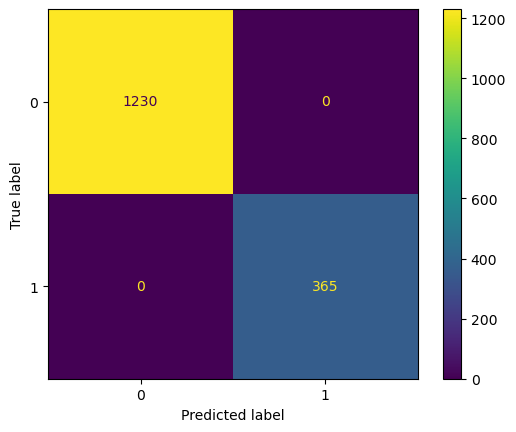

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1230
           1       1.00      1.00      1.00       365

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, X, y, cv=5)
print(scores)
print("Mean CV Score:", scores.mean())


[1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [25]:
# Save the model
with open("high_risk_model.pkl", "wb") as f:
    pickle.dump(model2, f)

In [26]:
## testing the model

In [27]:
import pickle
import numpy as np

# Load the trained model
with open("high_risk_model.pkl", "rb") as file:
    model = pickle.load(file)


In [56]:
input_data = np.array([[ 
    70,  # Age
    0,   # Gender (1 for Female, 0 for Male)
    25.0,  # Temperature
    95.5,  # Humidity
    10.0,  # Rainfall
    45500,  # Platelet Count
    7,  # Month
    1,  # Year (Encoded)
    2,  # Age Group (Adult)

    # 14 Ward One-hot Encoded (e.g., Mehdipatnam)
    0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

    # 10 Symptom One-hot Encoded (e.g., muscle pain + bleeding)
    1, 0, 1, 0, 0, 1, 0, 1, 1, 1
]])


In [57]:
# Predict
prediction = model.predict(input_data)

# Interpret result
if prediction[0] == 1:
    print("⚠️ High Risk Case Detected (Critical/Dead likely)")
else:
    print("✅ Not a High Risk Case (Safe or Recoverable)")


⚠️ High Risk Case Detected (Critical/Dead likely)
